Проектная работа по модулю “Математика и статистика в Python”
1. Загрузить файл hr.csv.  
2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
3. Рассчитать и визуализировать корреляционную матрицу для переменных.
4. Визуализировать несколько взаимосвязей между переменными.
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.
6. Рассчитать сколько работников работает в каждом департаменте.
7. Показать распределение сотрудников по зарплатам.
8. Показать распределение сотрудников по зарплатам совместно с департаментами.
9. Сколько сотрудников покинули компанию.
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
import statistics
%matplotlib inline
from scipy import stats

#### **01. Загрузить файл hr.csv**

In [25]:
# df = pd.read_csv('F:\Program\git_base\GitHub\MyRepo\PYDA_FIN\HR.csv')
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


**Описание датафрейма**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### Так как точного описания датасета нет, действуем с учетом допущений
* **satisfaction_level** - Уровень удовлетворенности сотрудника (десятичное, от 0 до 1)  
* **last_evaluation** - Время, прошедшее с момента последней оценки в годах
* **number_projects** -  Количество выполненных проектов
* **average_monthly_hours** - Среднее количество рабочих часов за месяц
* **time_spend_company** -  Время работы в компании в годах
* **work_accident** -  У сотрудника был несчастный случай на рабочем месте
* **left** -  Работник уволился (1 или 0)
* **promotion_last_5years** -  Было ли у сотрудника повышение за последние 5 лет
* **sales** -  Отдел, в котором работает сотрудник
* **salary** - Уровень заработной платы (высокий, средний, низкий)

#### **02. Рассчитать основные статистики для переменных(среднее,медиана, мода, мин/макс, сред. отклонение)**

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Отдельно посчитаем моду.
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.select_dtypes(include='object').mode()

,sales,salary
0,sales,low


In [7]:
# Переменная salary очевидно носит ранговый характер, для возможности работы с нею переведем ее в числовой формат.
df['salary_cat'] = pd.factorize(df.salary)[0] + 1

03. Рассчитать и визуализировать корреляционную матрицу для переменных

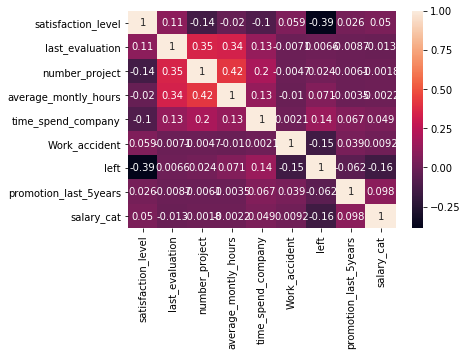

In [8]:
# Метод пирсона
corr_matrix_pearson = df.corr(method='pearson')
sns.heatmap(corr_matrix_pearson, annot=True)

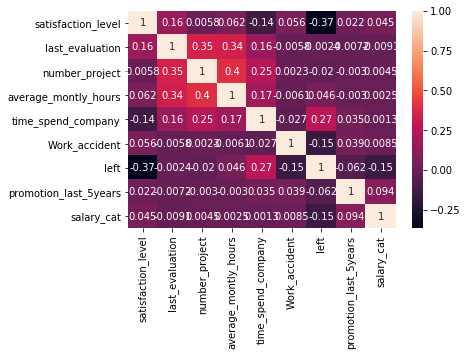

In [9]:
# Спирман
corr_matrix_spearman = df.corr(method='spearman')
sns.heatmap(corr_matrix_spearman, annot=True)

Существенных отличий между методами не наблюдаем. Сильных и даже средних корреляций не обнаруживаем. Но есть (рассматрим только значения >= |0.3|):

слабая обратная корреляция между уходом сотрудника из компании и уровнем его удволетворенности (логично, стоит изучать дальше);
слабая корреляция между последней оценкой сотрудника и среднем количеством отработанных в месяце часов. Можно выдвинуть гипотезу, что чем больше нагрузки берет на себя сотрудник, тем он более проффессионален/его лучше оценивает руководство (гипотеза требует более детальной проверки);
слабая корреляция между количеством проектов на сотруднике и последней его оценкой. Гипотеза может быть аналогична предыдущей, тем более что наблюдается корреляция между количеством отработанных часов и проектами
слабая прямяя корреляция между средним количеством рабочих часов в месяц и количеством проектов на сотруднике (что вполне логично, дополнительного изучения не требует).

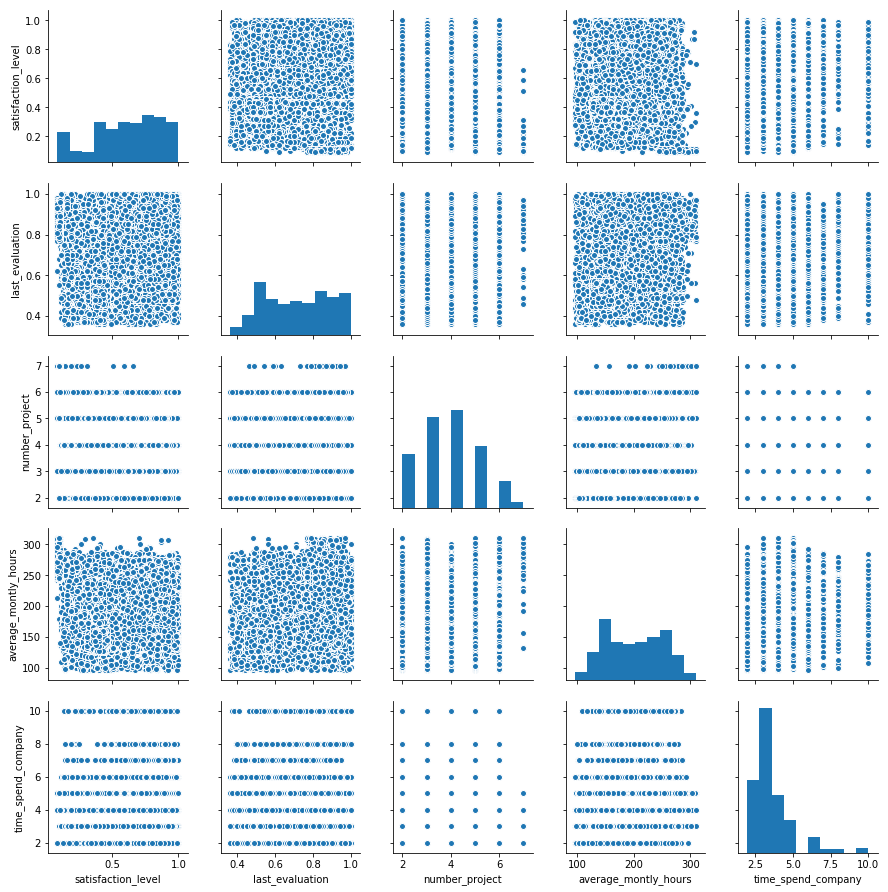

In [10]:
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']])

Полезной информации отсюда не так много, но можно сделать следующеие дополнительные выводы:

у сотрудников с максимальным количеством проектов уровень удовлетворенности тяготеет к более никзим значениям, высоких и средних значений значительно меньше, чем в группах с меньшим количеством проектов. Это может быть связано с перегруженностью сотрудников;
сотрудникам, кто мало проработал в компании и у кого меньший балл предыдущей оценки меньше вероятность того, что им дадут большее количество проктов в нагрузку.

Задание 5

Возможно, не совсем понял задание, но какой смысл проверять взаимосвязи между переменными при помощи t-теста, когда даже явных корреляций в данных нет? Все t-тесты дадут p-значение меньше 0.05.

In [16]:
print(stats.ttest_ind(df['number_project'], df['average_montly_hours']))
print(stats.ttest_ind(df['satisfaction_level'], df['salary_cat']))
print(stats.ttest_ind(df['satisfaction_level'], df['average_montly_hours']))

Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)
Ttest_indResult(statistic=-175.8115102805405, pvalue=0.0)
Ttest_indResult(statistic=-491.5064991295991, pvalue=0.0)


Задание 6

Cчитаем, сколько работников в каждом департаменте. Для начала смотрим сколько всего работает человек, без учета уволившихся (т.к. в описании датасета не сказано иного, будем считать, что уволившиеся маркируются 1). Итого сотрудников 11428.

In [11]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [12]:
# Самый многочисленный департамент продаж, самый малочисленный - hr.
count_by_dep = df[df['left']==0].groupby('sales').count()[['salary']].rename(columns={"salary":"count"}).reset_index().sort_values(by='count', ascending=False)
count_by_dep

,sales,count
7,sales,3126
9,technical,2023
8,support,1674
0,IT,954
6,product_mng,704
1,RandD,666
5,marketing,655
2,accounting,563
4,management,539
3,hr,524


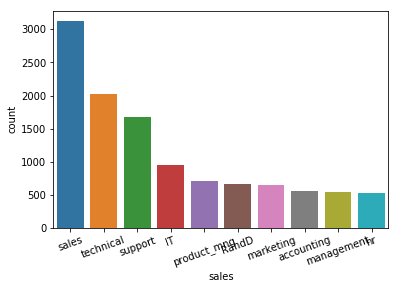

In [13]:
count_bar = sns.barplot(x=count_by_dep['sales'], y=count_by_dep['count'])
for item in count_bar.get_xticklabels(): 
    item.set_rotation(20)

Задание 7

Посмотрим распределение по зарплатам. 
Видим, что сотрудников с большой зарплатой - 8.2 процента от общего числа. С низкой - в 6 раз больше.

In [14]:
df.salary.value_counts() * 100

low       731600
medium    644600
high      123700
Name: salary, dtype: int64

In [15]:
df.salary.value_counts(normalize=True)*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

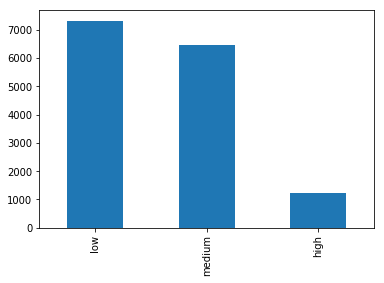

In [16]:
df.salary.value_counts().plot(kind='bar')

Задание 8
Считаем и визуализируем распределение зарплат в разрезе департаментов.

In [17]:
salary_by_dep = df.groupby(['sales', 'salary']).count()[['left']].rename(columns={"left":"count_by_salary"}).reindex(level=1, index = ['high', 'medium', 'low'])
salary_by_dep

count_by_salary
sales       salary                 
IT          high                 83
            medium              535
            low                 609
RandD       high                 51
            medium              372
            low                 364
accounting  high                 74
            medium              335
            low                 358
hr          high                 45
            medium              359
            low                 335
management  high                225
            medium              225
            low                 180
marketing   high                 80
            medium              376
            low                 402
product_mng high                 68
            medium              383
            low                 451
sales       high                269
            medium             1772
            low                2099
support     high                141
            medium              942
            low                1146
technical   high                201
            medium             1147
            low                1372

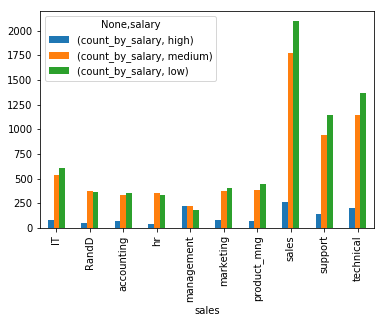

In [18]:
# Видим, что большее количество сотрудников с высокими зарплатами в департаменте продаж, наименьшее - в hr.
salary_by_dep.unstack('salary').plot(kind='bar')

Задание 9
Смотрим, сколько сотрудников покинуло компанию - 23.8%.

In [19]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [20]:
df['left'].value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

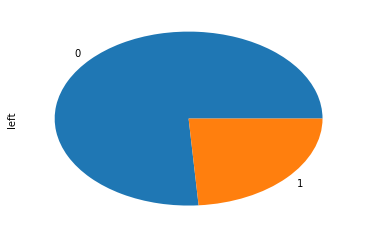

In [21]:
df['left'].value_counts().plot(kind='pie')

Задание 10
Посмотрим, почему сотрудники покидают компанию, рассчитав средние значения показателей в разрезе статуса сотрудников.

In [22]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_cat
left,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,1.650945
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.414730


Видим, что уровень удовлетворенности у уволившихя меньше, чем у оставшихся.

Также видим, что уволившиеся в среднем больше часов работали в месяц (вспоминаем, что есть корреляция между отработанным времени и удовлетворенностью).

Бросается в глаза то, что уволивщиеся намного реже получали повышение за последние 5 лет.

Проверяем статистическую значимость данных сравнений при помощи t-test. p-value < 0.05, значит разница в средних не обусловлена случаными колебаниям.

In [23]:
print(stats.ttest_ind(df[df['left']==1]['satisfaction_level'], df[df['left']==0]['satisfaction_level']))
print(stats.ttest_ind(df[df['left']==1]['average_montly_hours'], df[df['left']==0]['average_montly_hours']))
print(stats.ttest_ind(df[df['left']==1]['promotion_last_5years'], df[df['left']==0]['promotion_last_5years']))
print(stats.ttest_ind(df[df['left']==1]['salary_cat'], df[df['left']==0]['salary_cat']))

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)
Ttest_indResult(statistic=8.752254731850009, pvalue=2.3113035567540143e-18)
Ttest_indResult(statistic=-7.581195349367637, pvalue=3.624047224146943e-14)
Ttest_indResult(statistic=-19.58216626170969, pvalue=2.475238171818194e-84)


### 03. Рассчитать и визуализировать корреляционную матрицу для переменных.

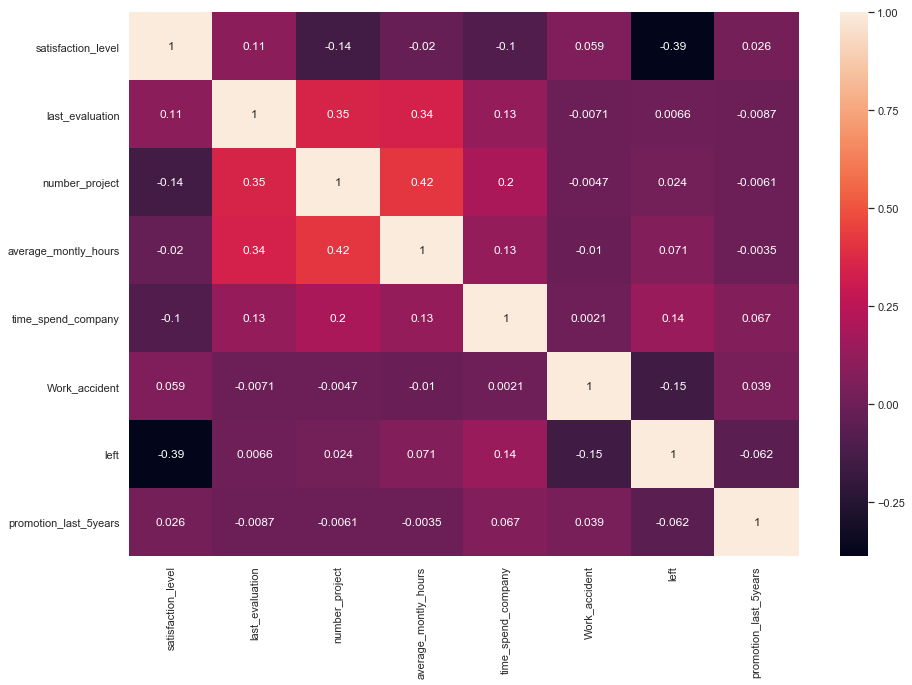

In [9]:
sns.set(rc=({'figure.figsize':(15, 10)}))
sns.heatmap(df.corr(), annot=True, xticklabels=df.corr().columns.values, yticklabels=df.corr().columns.values)

In [10]:
# Не вижу особой корреляции между параметрами

### 03. Визуализировать несколько взаимосвязей между переменными.

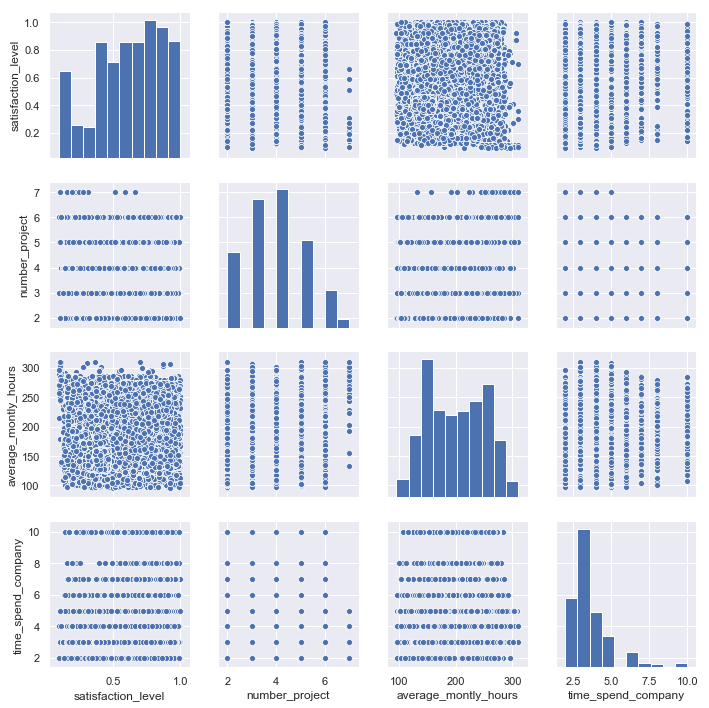

In [14]:
sns.pairplot(df[['satisfaction_level', 'number_project', 'average_montly_hours', 'time_spend_company']])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


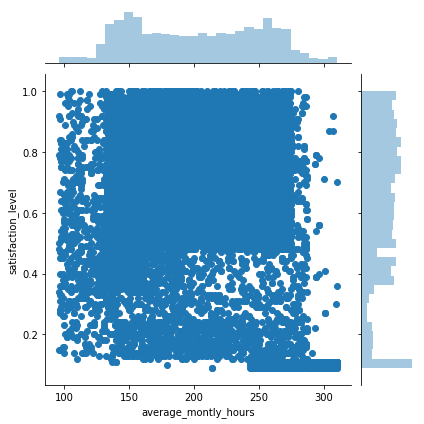

In [12]:
sns.jointplot(x='average_montly_hours', y='satisfaction_level', 
              data=df, kind='scatter')

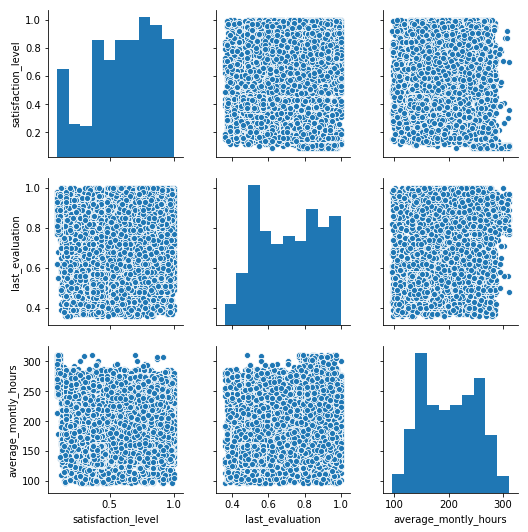

In [14]:
sns_plot = sns.pairplot(
    df[['satisfaction_level', 'last_evaluation','average_montly_hours']])
sns_plot